In [13]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [14]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [15]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

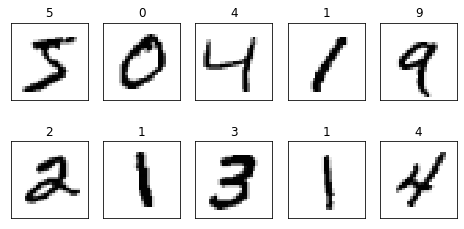

In [17]:
fig = plt.figure(figsize=(8, 4))
for c, (image, label) in enumerate(zip(train_images[:10], train_labels[:10])):
    subplot = fig.add_subplot(2, 5, c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((28, 28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)

In [32]:
model = models.Sequential()
model.add(layers.Dense(10, activation="softmax", input_shape=(28*28,),name="softmax"))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
softmax (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["acc"])

In [36]:
history = model.fit(train_images, train_labels,
                   validation_data=(test_images, test_labels),
                   batch_size=128, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.6734 - acc: 0.8322 - val_loss: 0.3829 - val_acc: 0.9018
Epoch 2/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3611 - acc: 0.9031 - val_loss: 0.3184 - val_acc: 0.9141
Epoch 3/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3188 - acc: 0.9129 - val_loss: 0.2977 - val_acc: 0.9167
Epoch 4/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2990 - acc: 0.9170 - val_loss: 0.2847 - val_acc: 0.9218
Epoch 5/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2872 - acc: 0.9200 - val_loss: 0.2787 - val_acc: 0.9228
Epoch 6/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2790 - acc: 0.9226 - val_loss: 0.2739 - val_acc: 0.9242
Epoch 7/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2737 - acc: 0.9235 - val_loss: 0.

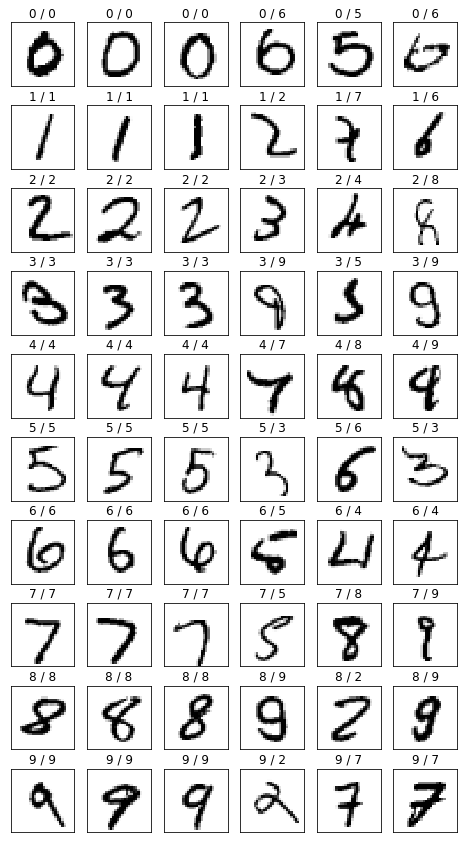

In [37]:
p_val = model.predict(np.array(test_images))
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    indices = list(correct[correct['pred']==i].index[:3]) \
                + list(incorrect[incorrect['pred']==i].index[:3])
    for c, image in enumerate(test_images[indices]):
        subplot = fig.add_subplot(10, 6, i*6+c+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d / %d' % (i, df['label'][indices[c]]))
        subplot.imshow(image.reshape((28, 28)),
                       vmin=0, vmax=1, cmap=plt.cm.gray_r)

### 結論

画像を回転させたりすると同じに見えるようなデータに対して精度が悪い。
CNN を使うべき